In [1]:
#IMPORT
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
from scipy import stats
import pickle
import gzip
import matplotlib.ticker as ticker
from scipy import stats

import sys
from pathlib import Path

current_dir = Path().resolve()

src_path = current_dir.parent / "src"

# Add to sys.path
sys.path.append(str(src_path))

from functions_simulator import *
from functions import *
import Utils as fx

# Get colors from colormaps
color1 = 'tab:blue' 

colors_viridis = cm.viridis(np.arange(500))

In [2]:
import matplotlib.cm as cm
Set1 = cm.get_cmap('Set1')
colors = [Set1(2),Set1(1),Set1(0)]

/var/folders/8j/xj5x54bs757dw9vt37nb69l40000gn/T/ipykernel_8586/3573412857.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  Set1 = cm.get_cmap('Set1')


In [3]:
PATHS=['Gscan_connectome_sub','Gscan_connectome_crit','Gscan_connectome_super']

In [4]:
case=['Subcritical','Critical','Supercritical']

In [16]:
path_data_simulated = 'my_out_folder/Gscan_connectome_super/' #'/Volumes/LaCie2/fufo/data/Interim/Bozzo/2025/'#

In [17]:
Gs=np.linspace(0.,0.21,16)
nG=len(Gs)

In [18]:
Cortical_labels=np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86, 87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103])
Working_labels=Cortical_labels

In [19]:
cortex_ids=[]
for i in range(len(Working_labels)):
    if Working_labels[i] in Cortical_labels:
        cortex_ids.append(i)

# EMPIRICAL

In [20]:
with open('../data/Empirical_fMRI/dFCs_emp.pkl', 'rb') as file:
    dFCs_emp= pickle.load(file)
with open('../data/Empirical_fMRI/FCs_emp.pkl', 'rb') as file:
    FCs_emp= pickle.load(file)
with open('../data/Empirical_fMRI/ZBold_emp.pkl', 'rb') as file:
    ZBold= pickle.load(file)

In [21]:
ZBold['1'].shape

(160, 50)

In [22]:
FCs_emp['1'].shape

(50, 50)

In [23]:
all_FCs = np.stack([v for v in FCs_emp.values()], axis=0)  # shape: (n, 50, 50)
FCs_avg = np.mean(all_FCs, axis=0) 

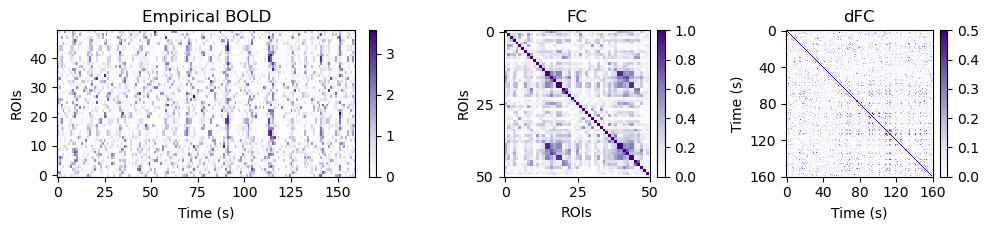

In [24]:
iii=37

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 2.4))
gs = fig.add_gridspec(1, 7)  # total of 4 columns

# First subplot spans 2 columns
ax1 = fig.add_subplot(gs[0, 0:3])
im1 = ax1.imshow(ZBold['%d'%iii].T, aspect='auto',origin='lower',cmap='Purples',vmin=0, interpolation='nearest')
ax1.set_title('Empirical BOLD')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('ROIs')
fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

# Second subplot spans 1 column
ax2 = fig.add_subplot(gs[0, 3:5])
im2 = ax2.imshow(FCs_emp['%d'%iii],cmap='Purples',interpolation='nearest', vmin=0,vmax=1)
ax2.set_title('FC')
ax2.set_xticks([0,25,50])
ax2.set_yticks([0,25,50])
ax2.set_xlabel('ROIs')
ax2.set_ylabel('ROIs')
fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

# Third subplot spans 1 column
ax3 = fig.add_subplot(gs[0, 5:7])
im3 = ax3.imshow(dFCs_emp['%d'%iii],cmap='Purples',interpolation='nearest', vmin=0,vmax=.5)
ax3.set_title('dFC')
ax3.set_xticks([0,40,80,120,160])
ax3.set_yticks([0,40,80,120,160])
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Time (s)')
fig.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)

# Tight layout to prevent overlap
plt.tight_layout()
#plt.savefig('../figures/Fig5/BOLD_FC_empirical.pdf', transparent=True, dpi=300)
plt.show()


In [25]:
# 16
# 27
# 37
# 50

# Global BOLD Raster

In [26]:
Gip=0

gadd=[15,2, 5]

tlen=20
tmax=180

Bi=np.zeros((3, tmax-tlen, len(Cortical_labels)))

for idat, dat in enumerate(PATHS):
    print(idat)
    for iG in [Gip]:
        with open(path_data_simulated + dat + '/data_G%d.pkl' % (iG+gadd[idat]), 'rb') as f:
            DATA = pickle.load(f)
            
        # Extract timeseries
        Bi[idat,:,:] = DATA['BOLD_R'][tlen:tmax, cortex_ids]  # BOLD timeseries

0
1
2


In [27]:
timez=np.linspace(0,tmax-tlen,5).astype(int)

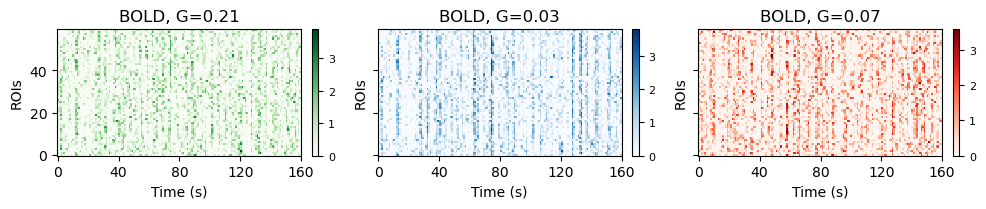

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# colormaps and subplot setup
colormaps = ['Greens', 'Blues', 'Reds']
fig, axes = plt.subplots(1, 3, figsize=(10, 2.2), sharey=True)

for i in range(3):
    im = axes[i].imshow(
        stats.zscore(Bi[i]).T,  # Z-score normalize across all values
        aspect='auto',
        origin='lower',
        cmap=colormaps[i],
        vmin=0, interpolation='nearest'
    )
    axes[i].set_title(r'BOLD, G=%.2f'%Gs[Gip+gadd[i]])#(f"{case[i]}")
    axes[i].set_xlabel("Time (s)")
    axes[i].set_xticks(timez)
    axes[i].set_xticklabels(timez)

    axes[i].set_ylabel("ROIs")

    # Add colorbar for each subplot
    cbar = fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
#plt.savefig('../figures/Fig5/BOLD_Rasters_simulated.pdf', transparent=True, dpi=300)
plt.show()


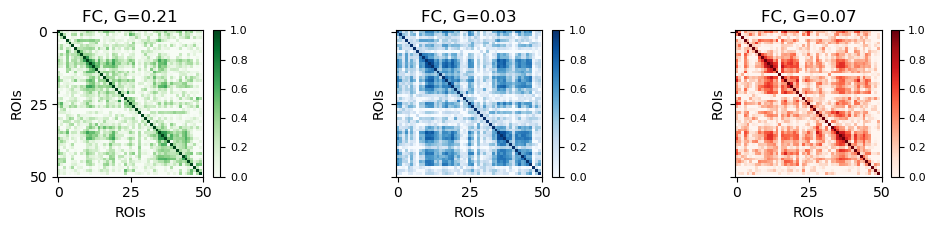

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

nreg=int(60/2)
removeroi=[19,17, 14, 21, 22, 19+nreg, 17+nreg, 14+nreg, 21+nreg, 22+nreg]
reroi=np.delete(np.arange(60),removeroi)

# colormaps and subplot setup
colormaps = ['Greens', 'Blues', 'Reds']
fig, axes = plt.subplots(1, 3, figsize=(10, 2.4), sharey=True)

for i in range(3):
    im = axes[i].imshow(
        np.corrcoef(Bi[i][np.ix_(reroi,reroi)].T),  # Z-score normalize across all values
        cmap=colormaps[i],interpolation='nearest', vmin=0,vmax=1
    )
    axes[i].set_title(r'FC, G=%.2f'%Gs[Gip+gadd[i]])#
    axes[i].set_xlabel("ROIs")
    axes[i].set_ylabel("ROIs")
    axes[i].set_xticks([0,25,50])
    axes[i].set_yticks([0,25,50])

    # Add colorbar for each subplot
    cbar = fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
#plt.savefig('../figures/Fig5/BOLD_FC_simulated.pdf', transparent=True, dpi=300)
plt.show()


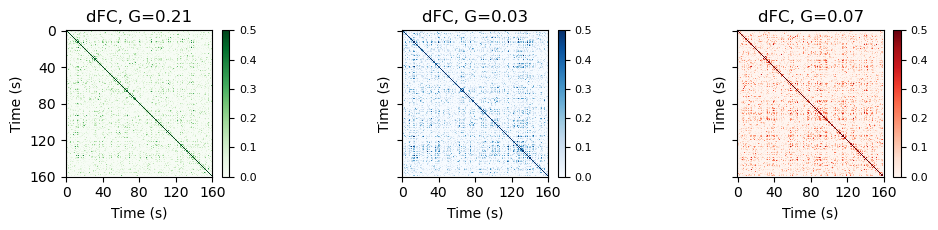

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

nreg=int(60/2)
removeroi=[19,17, 14, 21, 22, 19+nreg, 17+nreg, 14+nreg, 21+nreg, 22+nreg]
reroi=np.delete(np.arange(60),removeroi)

# colormaps and subplot setup
colormaps = ['Greens', 'Blues', 'Reds']
fig, axes = plt.subplots(1, 3, figsize=(10, 2.4), sharey=True)

for i in range(3):
    Edge_CA=go_edge(Bi[i][:,reroi])
    #Functional Connectivity Dynamics
    dFC=np.corrcoef(Edge_CA)
    im = axes[i].imshow(dFC,  # Z-score normalize across all values
        cmap=colormaps[i],interpolation='nearest', vmin=0,vmax=.5)
    axes[i].set_title(r'dFC, G=%.2f'%Gs[Gip+gadd[i]])#
    axes[i].set_xlabel("Time (s)")
    axes[i].set_ylabel("Time (s)")
    axes[i].set_xticks([0,40,80,120,160])
    axes[i].set_yticks([0,40,80,120,160])

    # Add colorbar for each subplot
    cbar = fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
#plt.savefig('../figures/Fig5/BOLD_dFC_simulated.pdf', transparent=True, dpi=300)
plt.show()


## Compare simulated and empirical data

In [171]:
path_data_simulated

'/Volumes/LaCie2/fufo/data/Interim/Bozzo/2025/'

In [31]:
FCs_sim_sub = np.zeros((nG, len(reroi), len(reroi)))
dFCs_sim_sub = np.zeros((nG, 160,160))

for iG in range(nG):
    with open(path_data_simulated + 'Gscan_connectome_sub/data_G%d.pkl' % iG, 'rb') as file:
        DATA = pickle.load(file)

    bold_sub = DATA['BOLD_R'][20:,reroi] # (time, regions) (170, 78)

    FCs_sim_sub[iG,:,:] = np.corrcoef(bold_sub.T)

    edges = go_edge(bold_sub)
    dFCs_sim_sub[iG,:,:] = np.corrcoef(edges)

In [32]:
FCs_sim_crit = np.zeros((nG, len(reroi), len(reroi)))
dFCs_sim_crit = np.zeros((nG, 160,160))

for iG in range(nG):
    with open(path_data_simulated + 'Gscan_connectome_crit/data_G%d.pkl' % iG, 'rb') as file:
        DATA = pickle.load(file)

    bold_crit = DATA['BOLD_R'][20:,reroi] # (time, regions) (170, 78)

    FCs_sim_crit[iG,:,:] = np.corrcoef(bold_crit.T)

    edges = go_edge(bold_crit)
    dFCs_sim_crit[iG,:,:] = np.corrcoef(edges)

In [33]:
FCs_sim_super = np.zeros((nG, len(reroi), len(reroi)))
dFCs_sim_super = np.zeros((nG, 160,160))

for iG in range(nG):
    with open(path_data_simulated + 'Gscan_connectome_super/data_G%d.pkl' % iG, 'rb') as file:
        DATA = pickle.load(file)

    bold_super = DATA['BOLD_R'][20:,reroi] # (time, regions) (170, 78)

    FCs_sim_super[iG,:,:] = np.corrcoef(bold_super.T)

    edges = go_edge(bold_super)
    dFCs_sim_super[iG,:,:] = np.corrcoef(edges)

In [34]:
bold_super.shape

(160, 50)

## Pearson corr

In [35]:
corr_emp_vs_sim_sub = np.zeros((len(FCs_emp.keys()), nG))
corr_emp_vs_sim_crit = np.zeros((len(FCs_emp.keys()), nG))
corr_emp_vs_sim_super = np.zeros((len(FCs_emp.keys()), nG))

for i in range(len(FCs_emp.keys())):
    for j in range(nG):
        corr_emp_vs_sim_sub[i,j] = np.corrcoef(FCs_emp[str(i+1)][np.triu_indices(len(reroi),1)], FCs_sim_sub[j,:,:][np.triu_indices(len(reroi),1)])[0,1]
        corr_emp_vs_sim_crit[i,j] = np.corrcoef(FCs_emp[str(i+1)][np.triu_indices(len(reroi),1)], FCs_sim_crit[j,:,:][np.triu_indices(len(reroi),1)])[0,1]
        corr_emp_vs_sim_super[i,j] = np.corrcoef(FCs_emp[str(i+1)][np.triu_indices(len(reroi),1)], FCs_sim_super[j,:,:][np.triu_indices(len(reroi),1)])[0,1]

## KS distance

### FCs

In [36]:
KS_emp_vs_sim_sub = np.zeros((len(FCs_emp.keys()), nG))
KS_emp_vs_sim_crit = np.zeros((len(FCs_emp.keys()), nG))
KS_emp_vs_sim_super = np.zeros((len(FCs_emp.keys()), nG))

for i in range(len(FCs_emp.keys())):
    for j in range(nG):
        KS_emp_vs_sim_sub[i,j] = stats.ks_2samp(FCs_emp[str(i+1)][np.triu_indices(len(reroi),1)], FCs_sim_sub[j,:,:][np.triu_indices(len(reroi),1)]).statistic
        KS_emp_vs_sim_crit[i,j] = stats.ks_2samp(FCs_emp[str(i+1)][np.triu_indices(len(reroi),1)], FCs_sim_crit[j,:,:][np.triu_indices(len(reroi),1)]).statistic
        KS_emp_vs_sim_super[i,j] = stats.ks_2samp(FCs_emp[str(i+1)][np.triu_indices(len(reroi),1)], FCs_sim_super[j,:,:][np.triu_indices(len(reroi),1)]).statistic

### dFCs

In [40]:
KS_demp_vs_sim_sub = np.zeros((len(dFCs_emp.keys()), nG))
KS_demp_vs_sim_crit = np.zeros((len(dFCs_emp.keys()), nG))
KS_demp_vs_sim_super = np.zeros((len(dFCs_emp.keys()), nG))

for i in range(len(dFCs_emp.keys())):
    for j in range(nG):
        KS_demp_vs_sim_sub[i,j] = stats.ks_2samp(dFCs_emp[str(i+1)][np.triu_indices(160,1)], dFCs_sim_sub[j,:,:][np.triu_indices(160,1)]).statistic
        KS_demp_vs_sim_crit[i,j] = stats.ks_2samp(dFCs_emp[str(i+1)][np.triu_indices(160,1)], dFCs_sim_crit[j,:,:][np.triu_indices(160,1)]).statistic
        KS_demp_vs_sim_super[i,j] = stats.ks_2samp(dFCs_emp[str(i+1)][np.triu_indices(160,1)], dFCs_sim_super[j,:,:][np.triu_indices(160,1)]).statistic

In [41]:
# Plots

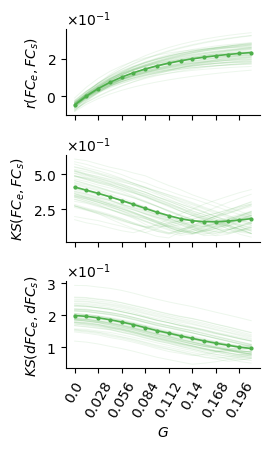

In [42]:
#color1
# Set figure size
fig, axes = plt.subplots(3, 1, figsize=(2.8, 4.6), sharex=True)  
iii = 16

# Define Gs shading region
shade_start, shade_end = 2,2#Gs[2], Gs[5]

# === Third subplot ===
ax1 = axes[0]
#ax1.axvline(shade_start,c='k',linestyle='--')
#ax1.axvspan(shade_start, shade_end, color='k', alpha=0.9)  # Vertical shading
ax1.plot(corr_emp_vs_sim_sub[:, :iii].T, linewidth=0.7, c=colors[0], alpha=0.1)
ax1.plot(np.mean(corr_emp_vs_sim_sub[:, :iii], axis=0), marker='o', linestyle='-', markersize=2, linewidth=1.2, c=colors[0], label=r'$r$($FC_{emp}, FC_{sim})$')
ax1.set_ylabel(r'$r$($FC_{e}, FC_{s})$', fontsize=10)

# Formatting
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(labelbottom=False)  # Hide x-axis ticks
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 3))  # Force scientific notation

# === First subplot ===
ax2 = axes[1]
#ax2.axvline(shade_start,c='k',linestyle='--')
#ax2.axvspan(shade_start, shade_end, color='k', alpha=0.9)  # Vertical shading
ax2.plot(KS_emp_vs_sim_sub[:, :iii].T, linewidth=0.7, c=colors[0], alpha=0.1)
ax2.plot(np.mean(KS_emp_vs_sim_sub[:, :iii], axis=0), marker='o', linestyle='-', markersize=2, linewidth=1.2, c=colors[0], label=r'KS$(FC_{emp}, FC_{sim})$')
ax2.set_ylabel(r'$KS$($FC_{e}, FC_{s})$', fontsize=10)

# Formatting
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(labelbottom=False)  # Hide x-axis ticks
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 3))  # Scientific notation

# === Second subplot ===
ax3 = axes[2]
#ax3.axvline(shade_start,c='k',linestyle='--')
#ax3.axvspan(shade_start, shade_end, color='k', alpha=0.9)  # Vertical shading
ax3.plot(KS_demp_vs_sim_sub[:, :iii].T, linewidth=0.7, c=colors[0], alpha=0.1)
ax3.plot(np.mean(KS_demp_vs_sim_sub[:, :iii], axis=0), marker='o', linestyle='-', markersize=2, linewidth=1.2, c=colors[0], label=r'KS$(dFC_{emp}, dFC_{sim})$')
ax3.set_ylabel(r'$KS$($dFC_{e}, dFC_{s})$', fontsize=10)

# Formatting
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0, 3))  # Scientific notation
#ax3.set_ylim(0.0,0.36)

# Set consistent x-axis ticks
plt.xticks(np.arange(len(np.arange(16)))[::2], np.round(Gs[np.arange(16)], 3)[::2], rotation=60)
plt.xlabel('$G$')

# Adjust layout and margins for alignment
plt.subplots_adjust(left=0.18)  # Adjust left margin to align y-axis labels properly
plt.tight_layout()

# Save figure
#plt.savefig('../figures/Fig5/BOLDvsG_sub.pdf', transparent=True, dpi=300)
plt.show()


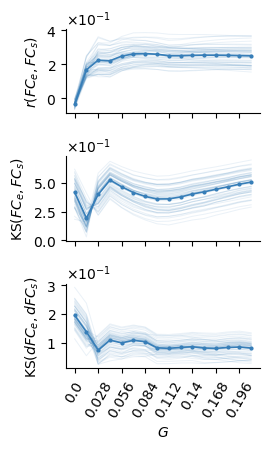

In [43]:
#color1
# Set figure size
fig, axes = plt.subplots(3, 1, figsize=(2.8, 4.6), sharex=True)  
iii = 16

# Define Gs shading region
shade_start, shade_end = 2,2#Gs[2], Gs[5]

# === Third subplot ===
ax1 = axes[0]
#ax1.axvline(shade_start,c='k',linestyle='--')
#ax1.axvspan(shade_start, shade_end, color='k', alpha=0.9)  # Vertical shading
ax1.plot(corr_emp_vs_sim_crit[:, :iii].T, linewidth=0.7, c=colors[1], alpha=0.1)
ax1.plot(np.mean(corr_emp_vs_sim_crit[:, :iii], axis=0), marker='o', linestyle='-', markersize=2, linewidth=1.2, c=colors[1], label=r'$r$($FC_{emp}, FC_{sim})$')
ax1.set_ylabel(r'$r$($FC_{e}, FC_{s})$', fontsize=10)

# Formatting
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(labelbottom=False)  # Hide x-axis ticks
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 3))  # Force scientific notation

# === First subplot ===
ax2 = axes[1]
#ax2.axvline(shade_start,c='k',linestyle='--')
#ax2.axvspan(shade_start, shade_end, color='k', alpha=0.9)  # Vertical shading
ax2.plot(KS_emp_vs_sim_crit[:, :iii].T, linewidth=0.7, c=colors[1], alpha=0.1)
ax2.plot(np.mean(KS_emp_vs_sim_crit[:, :iii], axis=0), marker='o', linestyle='-', markersize=2, linewidth=1.2, c=colors[1], label=r'KS$(FC_{emp}, FC_{sim})$')
ax2.set_ylabel(r'KS$(FC_{e}, FC_{s})$', fontsize=10)

# Formatting
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(labelbottom=False)  # Hide x-axis ticks
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 3))  # Scientific notation

# === Second subplot ===
ax3 = axes[2]
#ax3.axvline(shade_start,c='k',linestyle='--')
#ax3.axvspan(shade_start, shade_end, color='k', alpha=0.9)  # Vertical shading
ax3.plot(KS_demp_vs_sim_crit[:, :iii].T, linewidth=0.7, c=colors[1], alpha=0.1)
ax3.plot(np.mean(KS_demp_vs_sim_crit[:, :iii], axis=0), marker='o', linestyle='-', markersize=2, linewidth=1.2, c=colors[1], label=r'KS$(dFC_{emp}, dFC_{sim})$')
ax3.set_ylabel(r'KS$(dFC_{e}, dFC_{s})$', fontsize=10)

# Formatting
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0, 3))  # Scientific notation
#ax3.set_ylim(0.0,0.36)

# Set consistent x-axis ticks
plt.xticks(np.arange(len(np.arange(16)))[::2], np.round(Gs[np.arange(16)], 3)[::2], rotation=60)
plt.xlabel('$G$')

# Adjust layout and margins for alignment
plt.subplots_adjust(left=0.18)  # Adjust left margin to align y-axis labels properly
plt.tight_layout()

# Save figure
#plt.savefig('../figures/Fig5/BOLDvsG_crit.pdf', transparent=True, dpi=300)
plt.show()


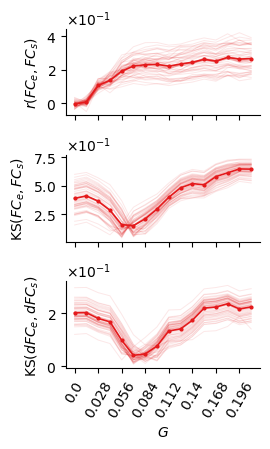

In [44]:
#color1
# Set figure size
fig, axes = plt.subplots(3, 1, figsize=(2.8, 4.6), sharex=True)  
iii = 16

# Define Gs shading region
shade_start, shade_end = 2,2#Gs[2], Gs[5]

# === Third subplot ===
ax1 = axes[0]
#ax1.axvline(shade_start,c='k',linestyle='--')
#ax1.axvspan(shade_start, shade_end, color='k', alpha=0.9)  # Vertical shading
ax1.plot(corr_emp_vs_sim_super[:, :iii].T, linewidth=0.7, c=colors[2], alpha=0.1)
ax1.plot(np.mean(corr_emp_vs_sim_super[:, :iii], axis=0), marker='o', linestyle='-', markersize=2, linewidth=1.2, c=colors[2], label=r'$r$($FC_{emp}, FC_{sim})$')
ax1.set_ylabel(r'$r$($FC_{e}, FC_{s})$', fontsize=10)

# Formatting
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(labelbottom=False)  # Hide x-axis ticks
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 3))  # Force scientific notation

# === First subplot ===
ax2 = axes[1]
#ax2.axvline(shade_start,c='k',linestyle='--')
#ax2.axvspan(shade_start, shade_end, color='k', alpha=0.9)  # Vertical shading
ax2.plot(KS_emp_vs_sim_super[:, :iii].T, linewidth=0.7, c=colors[2], alpha=0.1)
ax2.plot(np.mean(KS_emp_vs_sim_super[:, :iii], axis=0), marker='o', linestyle='-', markersize=2, linewidth=1.2, c=colors[2], label=r'KS$(FC_{emp}, FC_{sim})$')
ax2.set_ylabel(r'KS$(FC_{e}, FC_{s})$', fontsize=10)

# Formatting
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(labelbottom=False)  # Hide x-axis ticks
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 3))  # Scientific notation

# === Second subplot ===
ax3 = axes[2]
#ax3.axvline(shade_start,c='k',linestyle='--')
#ax3.axvspan(shade_start, shade_end, color='k', alpha=0.9)  # Vertical shading
ax3.plot(KS_demp_vs_sim_super[:, :iii].T, linewidth=0.7, c=colors[2], alpha=0.1)
ax3.plot(np.mean(KS_demp_vs_sim_super[:, :iii], axis=0), marker='o', linestyle='-', markersize=2, linewidth=1.2, c=colors[2], label=r'KS$(dFC_{emp}, dFC_{sim})$')
ax3.set_ylabel(r'KS$(dFC_{e}, dFC_{s})$', fontsize=10)

# Formatting
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0, 3))  # Scientific notation
#ax3.set_ylim(0.0,0.36)

# Set consistent x-axis ticks
plt.xticks(np.arange(len(np.arange(16)))[::2], np.round(Gs[np.arange(16)], 3)[::2], rotation=60)
plt.xlabel('$G$')

# Adjust layout and margins for alignment
plt.subplots_adjust(left=0.18)  # Adjust left margin to align y-axis labels properly
plt.tight_layout()

# Save figure
#plt.savefig('../figures/Fig5/BOLDvsG_super.pdf', transparent=True, dpi=300)
plt.show()


In [47]:
12000./6

2000.0